In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
# Connect to the database in .db format. Allows for SQL queries directly from here
database = "../data/raw/td_V2.db"
cnx = sql.connect(database)

In [3]:
query = "select * from GIT_COMMITS"
df = pd.read_sql_query(query, cnx)
df.head()

## Interesting Visualizations
Mean code length added by developers in each commit in a descendant order.


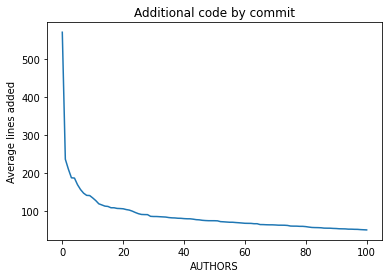

In [4]:
# Mean length code added commit by developer ordered by desc
query = "select c.author, avg(gcc.lines_added) as avg_add from GIT_COMMITS c natural inner join GIT_COMMITS_CHANGES gcc group by c.author ORDER by avg_add desc"
df = pd.read_sql_query(query, cnx)
#df.head()
ax = df.loc[0:100].plot(legend=None)
ax.set_xlabel("AUTHORS")
ax.set_ylabel("Average lines added")
ax.set_title("Additional code by commit")
plt.savefig("add_lines.png", dpi=300, bbox_inches="tight")

Issue's Severity distribution by project. We plot the 10 first projects alphabetically ordered.

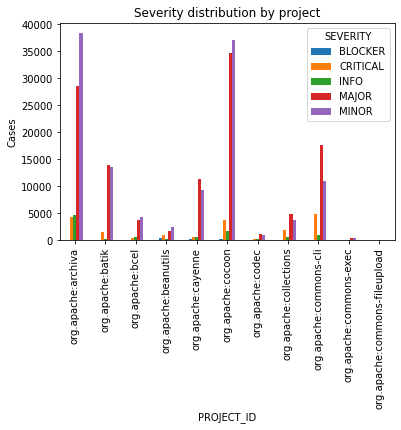

In [5]:
# Issue's Severity distribution by project
query = "SELECT si.PROJECT_ID, si.SEVERITY, count(si.SEVERITY) as count_sev FROM SONAR_ISSUES si group by si.PROJECT_ID, si.SEVERITY"
df = pd.read_sql_query(query, cnx)
n = 10 # number of projects
df_cut = df.loc[0:(n*5-1)]
ax = df_cut.pivot(index='PROJECT_ID', columns='SEVERITY', values='count_sev').plot(kind='bar')
ax.set_ylabel("Cases")
ax.set_title("Severity distribution by project")
plt.savefig("sev_distrib.png", dpi=300, bbox_inches="tight")

Instances of each type of refactoring operations.

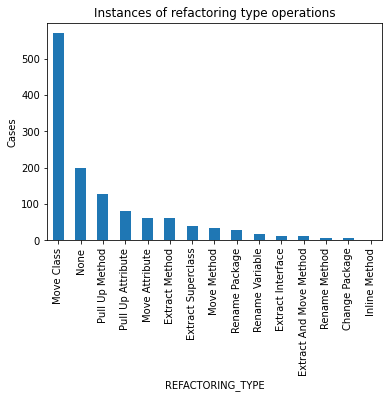

In [6]:
# Count of each type of refactoring operations
query = "select rm.REFACTORING_TYPE, count() as 'cases' from GIT_COMMITS c join SZZ_FAULT_INDUCING_COMMITS fc on fc.FAULT_INDUCING_COMMIT_HASH = c.COMMIT_HASH left join REFACTORING_MINER rm on rm.COMMIT_HASH = c.COMMIT_HASH group by REFACTORING_TYPE order by count() desc"
df = pd.read_sql_query(query, cnx)
ax = df.plot(x = "REFACTORING_TYPE", y = "cases", kind="bar", legend=None)
ax.set_ylabel("Cases")
ax.set_title("Instances of refactoring type operations")
plt.savefig("refact_type.png", dpi=300, bbox_inches="tight")

In the following plots, we can see the different commits there are in the tables: GIT_COMMITS, SONAR_ANALYSIS, 

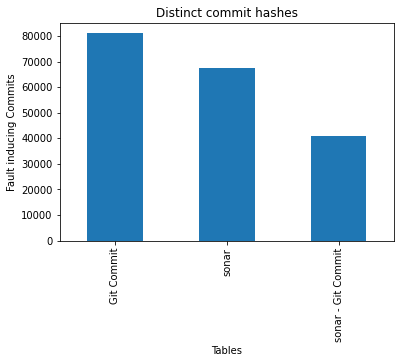

In [7]:
query = "select DISTINCT 'Git Commit', count(DISTINCT gc.COMMIT_HASH) as distinct_comm_hash from GIT_COMMITS gc union select 'sonar', count( distinct sa.REVISION ) from SONAR_ANALYSIS sa union select 'sonar - Git Commit', count( distinct sa.REVISION ) from SONAR_ANALYSIS sa join GIT_COMMITS ci on ci.COMMIT_HASH = sa.REVISION"
df = pd.read_sql_query(query, cnx)
ax = df.plot.bar(x = "'Git Commit'", y = "distinct_comm_hash",legend=None)
ax.set_xlabel("Tables")
ax.set_ylabel("Fault inducing Commits")
ax.set_title("Distinct commit hashes")
plt.savefig("hash_git_sonar.png", dpi=300)

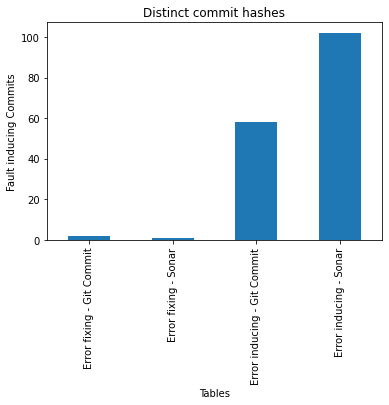

In [8]:
query = "SELECT DISTINCT 'Error inducing - Sonar' as 'type', count(DISTINCT fc.FAULT_INDUCING_COMMIT_HASH) as ind_comm from SZZ_FAULT_INDUCING_COMMITS fc join SONAR_ANALYSIS sa on sa.REVISION = fc.FAULT_INDUCING_COMMIT_HASH and fc.PROJECT_ID = sa.PROJECT_ID  UNION select 'Error inducing - Git Commit', count(distinct ci.COMMIT_HASH) FROM SZZ_FAULT_INDUCING_COMMITS fc join GIT_COMMITS ci on ci.COMMIT_HASH = fc.FAULT_INDUCING_COMMIT_HASH and ci.PROJECT_ID = fc.PROJECT_ID union SELECT DISTINCT 'Error fixing - Sonar' as 'type', count(DISTINCT fc.FAULT_FIXING_COMMIT_HASH) as ind_comm from SZZ_FAULT_INDUCING_COMMITS fc join SONAR_ANALYSIS sa on sa.REVISION = fc.FAULT_FIXING_COMMIT_HASH and fc.PROJECT_ID = sa.PROJECT_ID  UNION select 'Error fixing - Git Commit', count(distinct ci.COMMIT_HASH) FROM SZZ_FAULT_INDUCING_COMMITS fc join GIT_COMMITS ci on ci.COMMIT_HASH = fc.FAULT_FIXING_COMMIT_HASH and ci.PROJECT_ID = fc.PROJECT_ID"
df = pd.read_sql_query(query, cnx)
ax = df.plot.bar(x = "type", y = "ind_comm",legend=None)
ax.set_xlabel("Tables")
ax.set_ylabel("Fault inducing Commits")
ax.set_title("Distinct commit hashes")
plt.savefig("hash_fix_ind.png", dpi=300, edgecolor = 'red', bbox_inches="tight")

Different commits that created some Jira Issue and exists in the GIT_COMMITS table.

In [9]:
query = "select 'jira issue - Git Commit', count(distinct sa.HASH) from jira_issues sa join  GIT_COMMITS ci on ci.COMMIT_HASH = sa.HASH" 
df = pd.read_sql_query(query, cnx)
df

'jira issue - Git Commit'  count(distinct sa.HASH)
0   jira issue - Git Commit                        5

For the slides plots:

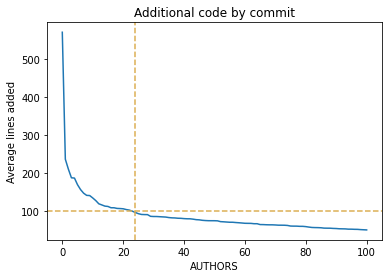

In [10]:
query = "select c.author, avg(gcc.lines_added) as avg_add from GIT_COMMITS c natural inner join GIT_COMMITS_CHANGES gcc group by c.author ORDER by avg_add desc"
df = pd.read_sql_query(query, cnx)
ax = df.loc[0:100].plot(legend=None)
ax.set_xlabel("AUTHORS")
ax.set_ylabel("Average lines added")
ax.set_title("Additional code by commit")
ax.axhline(100, ls= '--').set_color("#dcae52")
ax.axvline(24, ls= '--').set_color("#dcae52")

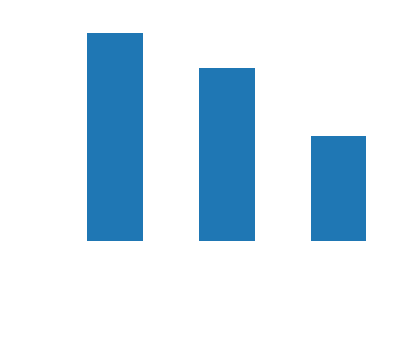

In [11]:
query = "select DISTINCT 'Git Commit', count(DISTINCT gc.COMMIT_HASH) as distinct_comm_hash from GIT_COMMITS gc union select 'sonar', count( distinct sa.REVISION ) from SONAR_ANALYSIS sa union select 'sonar - Git Commit', count( distinct sa.REVISION ) from SONAR_ANALYSIS sa join GIT_COMMITS ci on ci.COMMIT_HASH = sa.REVISION"
df = pd.read_sql_query(query, cnx)
ax = df.plot.bar(x = "'Git Commit'", y = "distinct_comm_hash",legend=None)
ax.set_xlabel("Tables")
ax.set_ylabel("Fault inducing Commits")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title("Distinct commit hashes").set_color('white')
for key, spine in ax.spines.items():
    spine.set_visible(False)

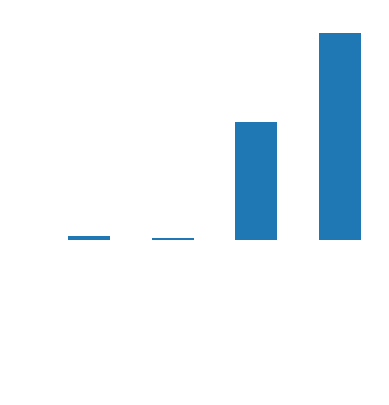

In [12]:
query = "SELECT DISTINCT 'Error inducing - Sonar' as 'type', count(DISTINCT fc.FAULT_INDUCING_COMMIT_HASH) as ind_comm from SZZ_FAULT_INDUCING_COMMITS fc join SONAR_ANALYSIS sa on sa.REVISION = fc.FAULT_INDUCING_COMMIT_HASH and fc.PROJECT_ID = sa.PROJECT_ID  UNION select 'Error inducing - Git Commit', count(distinct ci.COMMIT_HASH) FROM SZZ_FAULT_INDUCING_COMMITS fc join GIT_COMMITS ci on ci.COMMIT_HASH = fc.FAULT_INDUCING_COMMIT_HASH and ci.PROJECT_ID = fc.PROJECT_ID union SELECT DISTINCT 'Error fixing - Sonar' as 'type', count(DISTINCT fc.FAULT_FIXING_COMMIT_HASH) as ind_comm from SZZ_FAULT_INDUCING_COMMITS fc join SONAR_ANALYSIS sa on sa.REVISION = fc.FAULT_FIXING_COMMIT_HASH and fc.PROJECT_ID = sa.PROJECT_ID  UNION select 'Error fixing - Git Commit', count(distinct ci.COMMIT_HASH) FROM SZZ_FAULT_INDUCING_COMMITS fc join GIT_COMMITS ci on ci.COMMIT_HASH = fc.FAULT_FIXING_COMMIT_HASH and ci.PROJECT_ID = fc.PROJECT_ID"
df = pd.read_sql_query(query, cnx)
ax = df.plot.bar(x = "type", y = "ind_comm",legend=None)
ax.set_xlabel("Tables")
ax.set_ylabel("Fault inducing Commits")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title("Distinct commit hashes").set_color('white')
for key, spine in ax.spines.items():
    spine.set_visible(False)